# Loading Data

### Adding libraries needed

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [28]:
## Load the CSV file into a DataFrame
data = pd.read_csv('final_dataset.csv')
data


,title,text,subject,date,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,1
...,...,...,...,...,...
44914,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,16-Jan-16,0
44915,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,16-Jan-16,0
44916,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,15-Jan-16,0
44917,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,14-Jan-16,0


# Data Exploration

#### data description 

In [6]:
data.describe()

,type
count,44919.000000
mean,0.476792
std,0.499467
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Features of columns in dataset 
    >TITLE- TITLE OF NEWS 
	>TEXT- DESCRIPTION OF THE NEWS
	>SUBJECT- Shows Type of News 
	>DATA - Shows date of news 
	>TYPE- shows news is true or false news(1(true) and 0(false))

In [20]:
data.columns

Index(['title', 'text', 'subject', 'date', 'type'], dtype='object')

#### Knowing datatypes of each column

In [23]:
data.dtypes

title      object
text       object
subject    object
date       object
type        int64
dtype: object

#### Histogram plotted based on type of data 

array([[<Axes: title={'center': 'type'}>]], dtype=object)

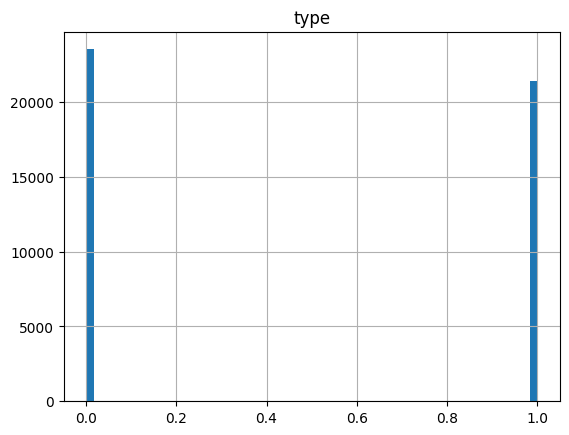

In [24]:
data.hist(bins=60)

In [30]:
data['type'].unique()

array([1, 0], dtype=int64)

#### Comparing true news and fake news via bar graph 

<Axes: xlabel='type'>

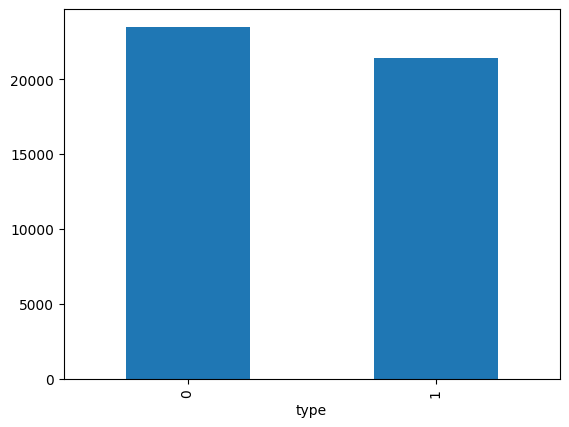

In [32]:
data['type'].value_counts().plot(kind='bar')

### Checking values for each columns 

In [39]:
data['type'].value_counts()

type
0    23502
1    21417
Name: count, dtype: int64

In [36]:
data['text'].value_counts().sum()

44919

In [37]:
data['title'].value_counts()

title
Factbox: Trump fills top jobs for his administration                                                     14
Factbox: Contenders for senior jobs in Trump's administration                                             8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                          8
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                 6
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead     6
                                                                                                         ..
Pope heads for Bangladesh after diplomatic balancing act in Myanmar                                       1
Japan emperor to cede all public duties after abdication: prince                                          1
Russia's Lavrov: little difference between policies of Trump and Obama - RIA                              1
Election crisis engulf

# Data cleaning

### Checking colums and Removing unnecessary columns 

In [7]:
data.columns

Index(['title', 'text', 'subject', 'date', 'type'], dtype='object')

In [8]:
#removal of unnecessary data 
df=data[['title','text','type']]
df

,title,text,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
44914,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
44915,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
44916,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
44917,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


### checking for nulls and duplicate values

In [9]:
df.isna().sum()

title    0
text     0
type     0
dtype: int64

In [10]:
#checking for duplicates 
df['text'].duplicated().sum()


6262

#### dropping duplicate values

In [15]:
df=df.drop_duplicates()
df

,title,text,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
44128,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,0
44129,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,0
44130,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,0
44131,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,0


In [17]:
df.duplicated().sum()

0

### Checking if the data is balanced or not

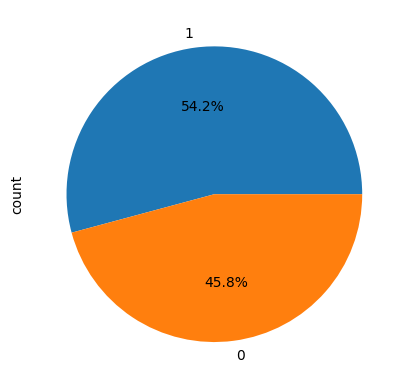

In [40]:
pie = df['type'].value_counts()
pie.plot(kind='pie', autopct='%1.1f%%')
plt.show()

#### Checking no.of records between the true and false news

In [41]:
df['type'].value_counts()

type
1    21197
0    17919
Name: count, dtype: int64

In [ ]:
# #if there are missing values we can impute data with knn or mean ,mode ,median
# from sklearn.impute import KNNImputer 
# impute=KNNImputer()

# for i in df.select_dtypes(include="number").columns:
#     df[i]=impute.fit_transform(df[[i]])

# Data Pre-processing

## Tokenization and removal of punctuation and stop words 

### Lowercasing alphabets in dataset in title and text

In [43]:
def preprocess_text(text):
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [50]:
df['title'] = df['title'].apply(preprocess_text)
df

,title,text,type
0,budget fight looms republicans flip fiscal script,washington reuters head conservative republica...,1
1,military accept transgender recruits monday pe...,washington reuters transgender people allowed ...,1
2,senior republican senator mueller job,washington reuters special counsel investigati...,1
3,fbi russia probe helped australian diplomat nyt,washington reuters trump campaign adviser geor...,1
4,trump wants postal service charge amazon shipm...,reuters president donald trump called postal s...,1
...,...,...,...
44128,white house theatrics gun control,21st century wire says world stage men women m...,0
44129,activists terrorists media controls dictates n...,randy johnson 21st century wirethe majority ma...,0
44130,boiler room surrender retreat heads roll ep 38,tune alternate current radio network acr anoth...,0
44131,federal showdown looms oregon blm abuse local ...,21st century wire says new front opened long b...,0


In [52]:
df['text'] = df['text'].apply(preprocess_text)
df

,title,text,type
0,budget fight looms republicans flip fiscal script,washington reuters head conservative republica...,1
1,military accept transgender recruits monday pe...,washington reuters transgender people allowed ...,1
2,senior republican senator mueller job,washington reuters special counsel investigati...,1
3,fbi russia probe helped australian diplomat nyt,washington reuters trump campaign adviser geor...,1
4,trump wants postal service charge amazon shipm...,reuters president donald trump called postal s...,1
...,...,...,...
44128,white house theatrics gun control,21st century wire says world stage men women m...,0
44129,activists terrorists media controls dictates n...,randy johnson 21st century wirethe majority ma...,0
44130,boiler room surrender retreat heads roll ep 38,tune alternate current radio network acr anoth...,0
44131,federal showdown looms oregon blm abuse local ...,21st century wire says new front opened long b...,0


## Applying stemming and lemmatization

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')


In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to apply stemming
def apply_stemming(text):
    return stemmer.stem(text)

# Function to apply lemmatization
def apply_lemmatization(text):
    return lemmatizer.lemmatize(text)

In [59]:
df['text'] = df['text'].apply(apply_stemming)
df['text'] = df['text'].apply(apply_lemmatization)
df['title'] = df['title'].apply(apply_stemming)
df['title'] = df['title'].apply(apply_lemmatization)
df

,title,text,type
0,budget fight looms republicans flip fiscal script,washington reuters head conservative republica...,1
1,military accept transgender recruits monday pe...,washington reuters transgender people allowed ...,1
2,senior republican senator mueller job,washington reuters special counsel investigati...,1
3,fbi russia probe helped australian diplomat nyt,washington reuters trump campaign adviser geor...,1
4,trump wants postal service charge amazon ship,reuters president donald trump called postal s...,1
...,...,...,...
44128,white house theatrics gun control,21st century wire says world stage men women m...,0
44129,activists terrorists media controls dictates n...,randy johnson 21st century wirethe majority ma...,0
44130,boiler room surrender retreat heads roll ep 38,tune alternate current radio network acr anoth...,0
44131,federal showdown looms oregon blm abuse local ...,21st century wire says new front opened long b...,0


## Removal of Special characters and symbols 

In [60]:
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df['title'] = df['title'].str.replace(r'[^\w\s]', '', regex=True)
df

,title,text,type
0,budget fight looms republicans flip fiscal script,washington reuters head conservative republica...,1
1,military accept transgender recruits monday pe...,washington reuters transgender people allowed ...,1
2,senior republican senator mueller job,washington reuters special counsel investigati...,1
3,fbi russia probe helped australian diplomat nyt,washington reuters trump campaign adviser geor...,1
4,trump wants postal service charge amazon ship,reuters president donald trump called postal s...,1
...,...,...,...
44128,white house theatrics gun control,21st century wire says world stage men women m...,0
44129,activists terrorists media controls dictates n...,randy johnson 21st century wirethe majority ma...,0
44130,boiler room surrender retreat heads roll ep 38,tune alternate current radio network acr anoth...,0
44131,federal showdown looms oregon blm abuse local ...,21st century wire says new front opened long b...,0
